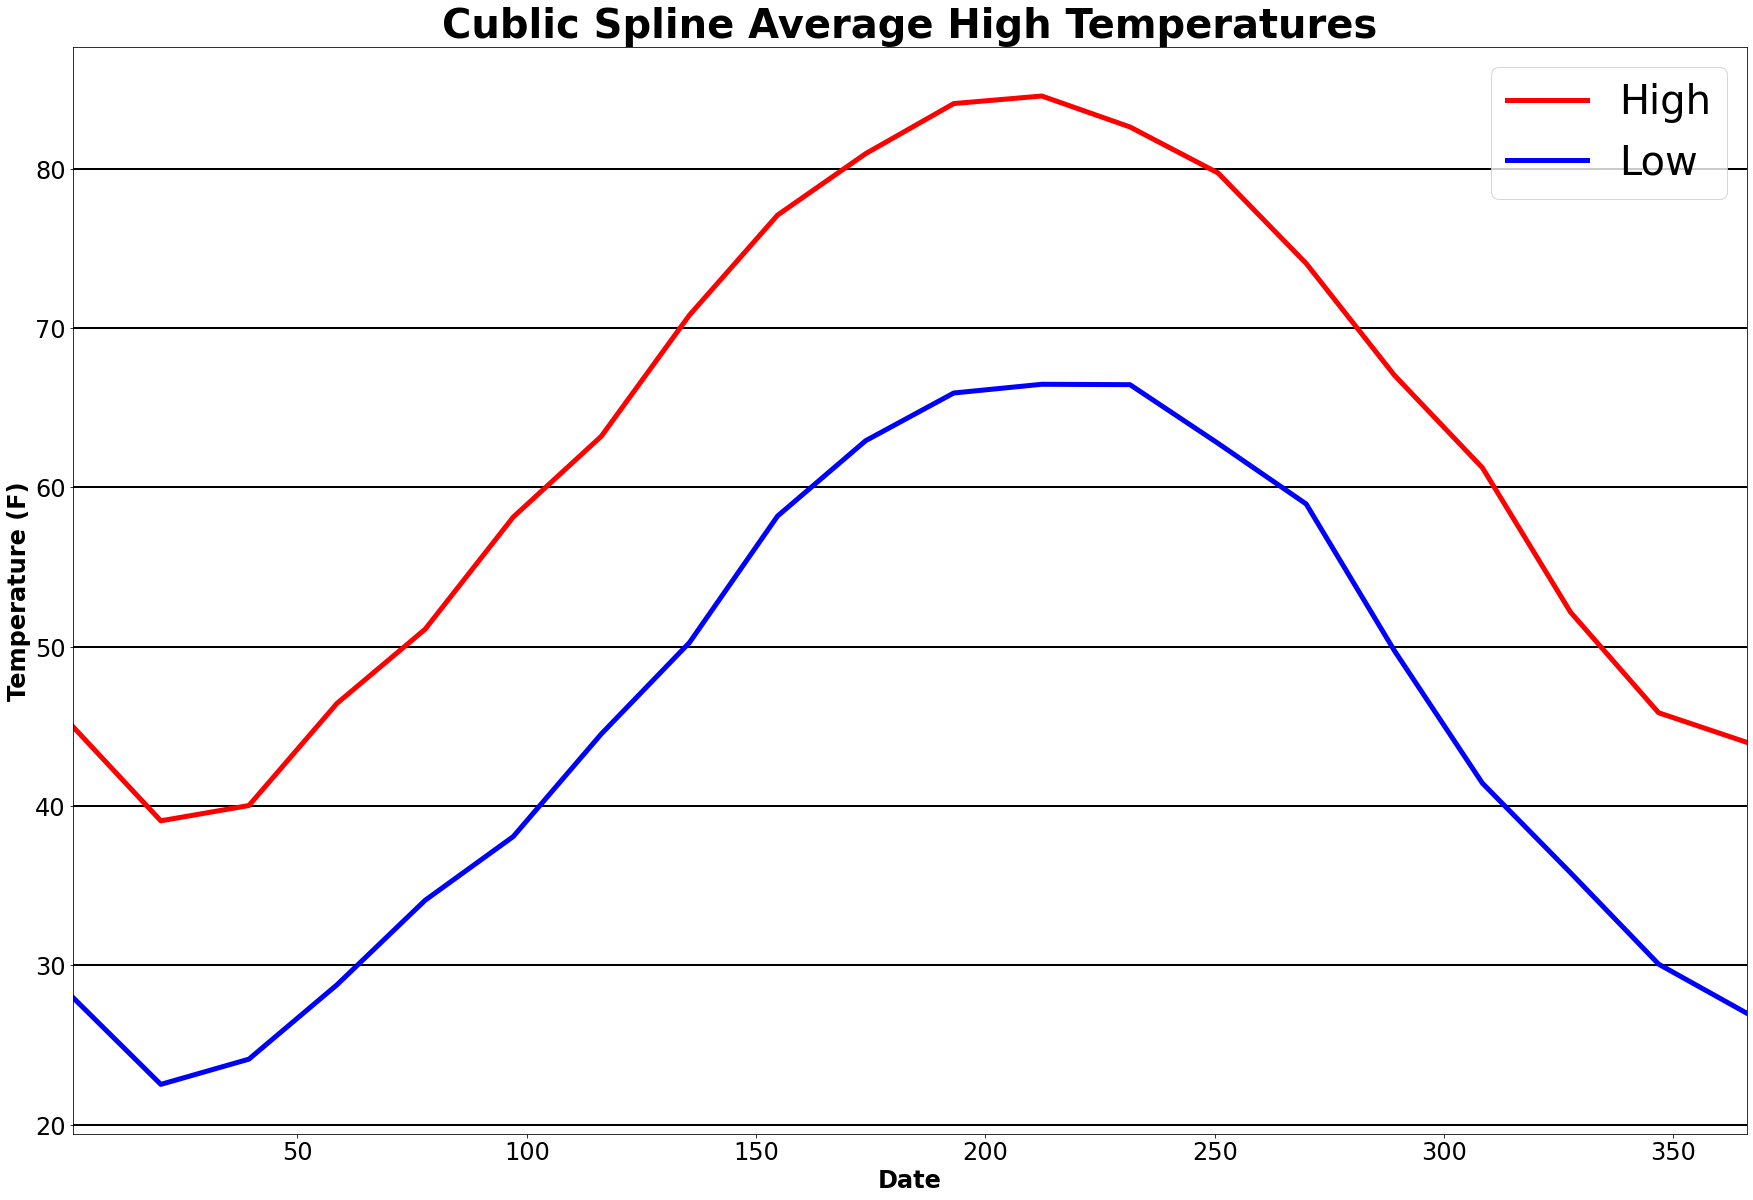

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas_datareader as pdr
import numpy as np
import numpy as np
from scipy.interpolate import make_interp_spline

# Set up needed variables
file_name = 'temps_Spline'
path = '/Volumes/Elements/code/readexcel/'
wxdata = f'{path}{file_name}.xlsx'

# Convert excel data to a Pandas dataframe
getTempdata = pd.read_excel(f'{wxdata}')
HI = getTempdata['High']
LO = getTempdata["Low"]
DATE = getTempdata['Day']

# Convert the Pandas dataframe to a NumPY dataframe
y = HI.to_numpy()
y1 = LO.to_numpy()
x = DATE.to_numpy()

#define x as xx equally spaced values between the min and max of original x 
xnew = np.linspace(x.min(), x.max(), 20) 

#define spline
HIspl = make_interp_spline(x, y)
y_smooth = HIspl(xnew)
LOspl = make_interp_spline(x, y1)
y1_smooth = LOspl(xnew)

# Plot the resulting curve
plt.figure(figsize=(30, 20))
plt.locator_params(axis='x', nbins= 12)
plt.xlim(1, 366)
plt.xticks(fontsize=24)
plt.xlabel('Date', fontsize=24, fontweight ='bold')
plt.yticks(fontsize=24)
plt.ylabel('Temperature (F)', fontsize=24, fontweight ='bold')
plt.locator_params(axis='y', nbins=10)
plt.title('Cublic Spline Average High Temperatures', fontsize=40, fontweight ='bold')
plt.grid(axis = "y", linewidth = 2.0, color = 'black')

plt.plot(xnew,y_smooth,color = "red", linewidth =5, label ="High")
plt.plot(xnew,y1_smooth,color = "blue", linewidth =5, label ="Low")
plt.legend(fontsize=40)